In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df = pd.read_excel('/content/b1_scld.xlsx')
df = df.dropna()

## Cluster

In [36]:
clus = df[[
'시설장소_주거_scld'
]]
clus = clus.dropna()

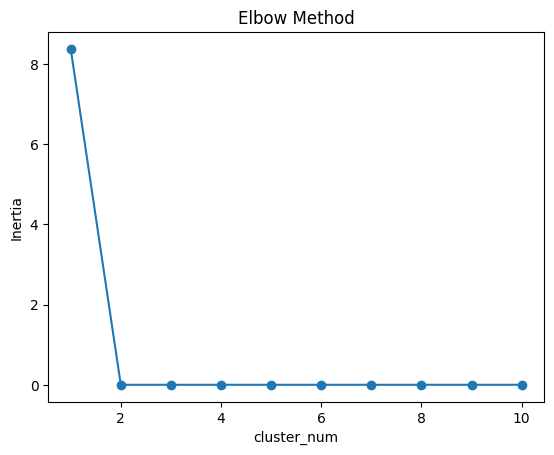

In [37]:
warnings.filterwarnings('ignore')
k_values = range(1,11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_res = kmeans.fit(clus)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('cluster_num')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clus)
label = kmeans.labels_
label = pd.Series(label)
clus['label'] = label.values
clus = pd.concat((df, clus['label']), axis=1)

In [39]:
df_to_split= clus.copy()

df_clus1 = df_to_split[df_to_split['label'] == 0]
df_clus2 = df_to_split[df_to_split['label'] == 1]
df_clus3 = df_to_split[df_to_split['label'] == 2]

print(df_clus1.shape)
print(df_clus2.shape)
print(df_clus3.shape)

(19, 73)
(15, 73)
(0, 73)


In [25]:
y_data_c1 = df_clus1['재산피해금액_scld']
x_data_c1 = df_clus1.drop(['재산피해금액_scld'],axis=1,inplace=False)
x_train_c1, x_test_c1, y_train_c1, y_test_c1 = train_test_split(x_data_c1, y_data_c1, test_size=0.2, random_state=156)

print(x_train_c1.shape)
print(y_train_c1.shape)
print(x_test_c1.shape)
print(y_test_c1.shape)

(8, 72)
(8,)
(2, 72)
(2,)


In [26]:
#----------------------------------------------------------------------------------------------------------------------------
lr_c1 = LinearRegression().fit(x_train_c1, y_train_c1)
ridge_c1 = Ridge(alpha=1.0).fit(x_train_c1, y_train_c1)
lasso_c1 = Lasso().fit(x_train_c1, y_train_c1)

lr_preds_c1 = lr_c1.predict(x_test_c1)
ridge_preds_c1 = ridge_c1.predict(x_test_c1)
lasso_preds_c1 = lasso_c1.predict(x_test_c1)

lr_mse_c1 = mean_squared_error(y_test_c1, lr_preds_c1)
ridge_mse_c1 = mean_squared_error(y_test_c1, ridge_preds_c1)
lasso_mse_c1 = mean_squared_error(y_test_c1, lasso_preds_c1)

lr_rmse_c1 = np.sqrt(lr_mse_c1)
ridge_rmse_c1 = np.sqrt(ridge_mse_c1)
lasso_rmse_c1 = np.sqrt(lasso_mse_c1)

#----------------------------------------------------------------------------------------------------------------------------

y_data_c2 = df_clus1['재산피해금액_scld']
x_data_c2 = df_clus1.drop(['재산피해금액_scld'],axis=1,inplace=False)
x_train_c2, x_test_c2, y_train_c2, y_test_c2 = train_test_split(x_data_c2, y_data_c2, test_size=0.2, random_state=156)

lr_c2 = LinearRegression().fit(x_train_c2, y_train_c2)
ridge_c2 = Ridge(alpha=1.0).fit(x_train_c2, y_train_c2)
lasso_c2 = Lasso().fit(x_train_c2, y_train_c2)

lr_preds_c2 = lr_c2.predict(x_test_c2)
ridge_preds_c2 = ridge_c2.predict(x_test_c2)
lasso_preds_c2 = lasso_c2.predict(x_test_c2)

lr_mse_c2 = mean_squared_error(y_test_c2, lr_preds_c2)
ridge_mse_c2 = mean_squared_error(y_test_c2, ridge_preds_c2)
lasso_mse_c2 = mean_squared_error(y_test_c2, lasso_preds_c2)

lr_rmse_c2 = np.sqrt(lr_mse_c2)
ridge_rmse_c2 = np.sqrt(ridge_mse_c2)
lasso_rmse_c2 = np.sqrt(lasso_mse_c2)

#----------------------------------------------------------------------------------------------------------------------------

y_data_c3 = df_clus1['재산피해금액_scld']
x_data_c3 = df_clus1.drop(['재산피해금액_scld'],axis=1,inplace=False)
x_train_c3, x_test_c3, y_train_c3, y_test_c3 = train_test_split(x_data_c3, y_data_c3, test_size=0.2, random_state=156)

lr_c3 = LinearRegression().fit(x_train_c3, y_train_c3)
ridge_c3 = Ridge(alpha=1.0).fit(x_train_c3, y_train_c3)
lasso_c3 = Lasso().fit(x_train_c3, y_train_c3)

lr_preds_c3 = lr_c3.predict(x_test_c3)
ridge_preds_c3 = ridge_c3.predict(x_test_c3)
lasso_preds_c3 = lasso_c3.predict(x_test_c3)

lr_mse_c3 = mean_squared_error(y_test_c3, lr_preds_c3)
ridge_mse_c3 = mean_squared_error(y_test_c3, ridge_preds_c3)
lasso_mse_c3 = mean_squared_error(y_test_c3, lasso_preds_c3)

lr_rmse_c3 = np.sqrt(lr_mse_c3)
ridge_rmse_c3 = np.sqrt(ridge_mse_c3)
lasso_rmse_c3 = np.sqrt(lasso_mse_c3)

#----------------------------------------------------------------------------------------------------------------------------

print(" Cluster_clus1")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lr_mse_c1, lr_rmse_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c1, lr_preds_c1)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(ridge_mse_c1, ridge_rmse_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c1, ridge_preds_c1)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lasso_mse_c1, lasso_rmse_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c1, lasso_preds_c1)), '\n\n')

print(" Cluster_clus2")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lr_mse_c2, lr_rmse_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c2, lr_preds_c2)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(ridge_mse_c2, ridge_rmse_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c2, ridge_preds_c2)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lasso_mse_c2, lasso_rmse_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c2, lasso_preds_c2)), '\n\n')

print(" Cluster_clus3")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lr_mse_c3, lr_rmse_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c3, lr_preds_c3)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(ridge_mse_c3, ridge_rmse_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c3, ridge_preds_c3)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lasso_mse_c3, lasso_rmse_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_test_c3, lasso_preds_c3)), '\n\n')

 Cluster_clus1
lr
MSE: 0.085 , RMSE: 0.292
Variance score: -1516544.736
------------------------------
ridge
MSE: 0.080 , RMSE: 0.283
Variance score: -1429941.713
------------------------------
lasso
MSE: 0.029 , RMSE: 0.169
Variance score: -508710.820 


 Cluster_clus2
lr
MSE: 0.085 , RMSE: 0.292
Variance score: -1516544.736
------------------------------
ridge
MSE: 0.080 , RMSE: 0.283
Variance score: -1429941.713
------------------------------
lasso
MSE: 0.029 , RMSE: 0.169
Variance score: -508710.820 


 Cluster_clus3
lr
MSE: 0.085 , RMSE: 0.292
Variance score: -1516544.736
------------------------------
ridge
MSE: 0.080 , RMSE: 0.283
Variance score: -1429941.713
------------------------------
lasso
MSE: 0.029 , RMSE: 0.169
Variance score: -508710.820 




## Non_Cluster

In [ ]:
df = pd.read_excel('/content/b21_kor_V4.xlsx')
df = df.dropna()

y_data = df['사망인명피해수_scld']
x_data = df.drop(['사망인명피해수_scld'],axis=1,inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=156)

lr = LinearRegression().fit(x_train, y_train)
ridge = Ridge(alpha=1.0).fit(x_train, y_train)
lasso = Lasso().fit(x_train, y_train)

lr_preds = lr.predict(x_test)
ridge_preds = ridge.predict(x_test)
lasso_preds = lasso.predict(x_test)

lr_mse = mean_squared_error(y_test, lr_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)

lr_rmse = np.sqrt(lr_mse)
ridge_rmse = np.sqrt(ridge_mse)
lasso_rmse = np.sqrt(lasso_mse)

print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lr_mse , lr_rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, lr_preds)), '\n\n')
print("rid")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(ridge_mse , ridge_rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, ridge_preds)), '\n\n')
print("laso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(lasso_mse , lasso_rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, lasso_preds)), '\n\n')

Dummied_lr
MSE: 976847082400643072.000 , RMSE: 988355746.885
Variance score: -184403613861643452416.000 


Dummied_rid
MSE: 0.006 , RMSE: 0.076
Variance score: -0.076 


Dummied_laso
MSE: 0.005 , RMSE: 0.073
Variance score: -0.011 


